In [114]:
#!pip install pyLDAvis==3.4.1
#!pip install --upgrade ipykernel

In [115]:
import nltk
import re
import os
import warnings
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [ ]:
#!python -m spacy download sv_core_news_sm

In [116]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [117]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonfr719/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Let's create a simple example corpus


In [118]:
# coffee
doc_1 = "The aroma of freshly brewed coffee tantalized my senses as I entered the cozy cafe on a brisk morning. \
        With each sip of rich, dark espresso, I felt a surge of energy coursing through my veins, \
        awakening my mind and spirit. As the steam rose from my mug, I savored the robust flavor of \
        the carefully roasted beans, \
        relishing in the simple pleasure of a perfect cup of coffee."

# tea
doc_2 = "The aroma of freshly steeped tea leaves filled the air, creating a sense of tranquility in the serene tea room. \
        With each delicate sip of fragrant jasmine tea, I felt a soothing warmth spreading through my body, \
        calming my senses. As I held the porcelain teacup in my hands, I savored the gentle infusion of flavors, \
        embracing the peaceful moment offered by a perfect cup of tea."

# sleep
doc_3 = "As night falls, the world fades away into a realm of dreams where the mind finds solace in the \
        embrace of sleep. In the depths of slumber, the body enters a state of restorative rest, \
        replenishing its energy for the challenges of the coming day. \
        Each peaceful breath in the quiet of the night serves as a reminder of the profound importance \
        of a good night's sleep for overall well-being."

# morning routines
doc_4 = "Morning routines set the tone for the day, offering a structured start to ensure productivity and balance. \
        From the invigorating aroma of freshly brewed coffee to the calming ritual of meditation, \
        each activity contributes to a harmonious beginning. Whether it's a brisk jog in the crisp \
        morning air or a moment of reflection amidst the chaos, morning routines provide a sacred space \
        to align mind, body, and spirit for the day ahead."


documents = [doc_1, doc_2, doc_3, doc_4]

In [119]:
documents

['The aroma of freshly brewed coffee tantalized my senses as I entered the cozy cafe on a brisk morning.         With each sip of rich, dark espresso, I felt a surge of energy coursing through my veins,         awakening my mind and spirit. As the steam rose from my mug, I savored the robust flavor of         the carefully roasted beans,         relishing in the simple pleasure of a perfect cup of coffee.',
 'The aroma of freshly steeped tea leaves filled the air, creating a sense of tranquility in the serene tea room.         With each delicate sip of fragrant jasmine tea, I felt a soothing warmth spreading through my body,         calming my senses. As I held the porcelain teacup in my hands, I savored the gentle infusion of flavors,         embracing the peaceful moment offered by a perfect cup of tea.',
 "As night falls, the world fades away into a realm of dreams where the mind finds solace in the         embrace of sleep. In the depths of slumber, the body enters a state of resto

## Step 1: Preprocessing

In [120]:
def to_lowercase(document):
    document = document.lower()
    return document

In [121]:
def remove_special_characters_english(document):
    document = re.sub(r'[^a-zA-Z\s]', '', document)
    return document

In [122]:
def remove_special_characters_swedish(document):
    document = re.sub(r'[^a-zA-ZåäöÅÄÖ\s]', '', document)
    return document

In [123]:
def tokenize(document):
    document = document.split()
    return document

In [124]:
stopwords_english = nltk.corpus.stopwords.words('english')

In [56]:
stopwords_swedish = nltk.corpus.stopwords.words('swedish')

In [70]:
def remove_stopwords_english(document):
    document = [token for token in document if token not in stopwords_english]
    return document

In [71]:
def remove_stopwords_swedish(document):
    document = [token for token in document if token not in stopwords_swedish]
    return document

In [126]:
def remove_letters(document):
    document = [token for token in document if len(token) > 1]
    return document

In [127]:
def lemmatize_english(tokenized_document):
    nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser', 'textcat'])
    doc = nlp(" ".join(tokenized_document))
    document = [token.lemma_ for token in doc]
    return document

In [128]:
def lemmatize_swedish(tokenized_document):
    nlp = spacy.load("sv_core_news_sm", disable=['ner', 'parser', 'textcat'])
    doc = nlp(" ".join(tokenized_document))
    document = [token.lemma_ for token in doc]
    return document

### Preprocessing example:

In [130]:
test_text = "This is 3!? somE ranDom.    Texts?!?! Please P helping me..."

In [131]:
test_text = to_lowercase(test_text)
test_text

'this is 3!? some random.    texts?!?! please p helping me...'

In [132]:
test_text = remove_special_characters_english(test_text)
test_text

'this is  some random    texts please p helping me'

In [133]:
test_text = tokenize(test_text)
test_text

['this', 'is', 'some', 'random', 'texts', 'please', 'p', 'helping', 'me']

In [134]:
test_text = remove_stopwords_english(test_text)
test_text

['random', 'texts', 'please', 'p', 'helping']

In [135]:
test_text = remove_letters(test_text)
test_text

['random', 'texts', 'please', 'helping']

In [136]:
test_text = lemmatize_english(test_text)
test_text

['random', 'text', 'please', 'help']

In [137]:
def preprocess_english(documents):
    preprocessed_documents = []

    for document in documents:
        document = to_lowercase(document)
        document = remove_special_characters_english(document)
        document = tokenize(document)
        document = remove_stopwords_english(document)
        document = lemmatize_english(document)
        document = remove_letters(document)
        preprocessed_documents.append(document)
    return preprocessed_documents

In [138]:
def preprocess_swedish(documents):
    preprocessed_documents = []

    for document in documents:
        document = to_lowercase(document)
        document = remove_special_characters_english(document)
        document = tokenize(document)
        document = remove_stopwords_swedish(document)
        document = lemmatize_swedish(document)
        document = remove_letters(document)
        preprocessed_documents.append(document)
    return preprocessed_documents

In [139]:
documents

['The aroma of freshly brewed coffee tantalized my senses as I entered the cozy cafe on a brisk morning.         With each sip of rich, dark espresso, I felt a surge of energy coursing through my veins,         awakening my mind and spirit. As the steam rose from my mug, I savored the robust flavor of         the carefully roasted beans,         relishing in the simple pleasure of a perfect cup of coffee.',
 'The aroma of freshly steeped tea leaves filled the air, creating a sense of tranquility in the serene tea room.         With each delicate sip of fragrant jasmine tea, I felt a soothing warmth spreading through my body,         calming my senses. As I held the porcelain teacup in my hands, I savored the gentle infusion of flavors,         embracing the peaceful moment offered by a perfect cup of tea.',
 "As night falls, the world fades away into a realm of dreams where the mind finds solace in the         embrace of sleep. In the depths of slumber, the body enters a state of resto

In [140]:
preprocessed_documents = preprocess_english(documents)
preprocessed_documents

[['aroma',
  'freshly',
  'brew',
  'coffee',
  'tantalize',
  'sense',
  'enter',
  'cozy',
  'cafe',
  'brisk',
  'morning',
  'sip',
  'rich',
  'dark',
  'espresso',
  'feel',
  'surge',
  'energy',
  'course',
  'vein',
  'awaken',
  'mind',
  'spirit',
  'steam',
  'rise',
  'mug',
  'savor',
  'robust',
  'flavor',
  'carefully',
  'roast',
  'bean',
  'relish',
  'simple',
  'pleasure',
  'perfect',
  'cup',
  'coffee'],
 ['aroma',
  'freshly',
  'steep',
  'tea',
  'leave',
  'fill',
  'air',
  'create',
  'sense',
  'tranquility',
  'serene',
  'tea',
  'room',
  'delicate',
  'sip',
  'fragrant',
  'jasmine',
  'tea',
  'feel',
  'soothe',
  'warmth',
  'spread',
  'body',
  'calm',
  'sense',
  'hold',
  'porcelain',
  'teacup',
  'hand',
  'savored',
  'gentle',
  'infusion',
  'flavor',
  'embrace',
  'peaceful',
  'moment',
  'offer',
  'perfect',
  'cup',
  'tea'],
 ['night',
  'fall',
  'world',
  'fade',
  'away',
  'realm',
  'dream',
  'mind',
  'find',
  'solace',


## Gensim Topicmodelling with LDA

In [141]:
id2word = corpora.Dictionary(preprocessed_documents)
corpus = [id2word.doc2bow(text) for text in preprocessed_documents]

In [142]:
corpus
# mapping (word_id, word_frequency)
# (7, 2) implies that word with id 7 occurs 2 times in document 1

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(0, 1),
  (10, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (21, 1),
  (29, 2),
  (31, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 4),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(12, 1),
  (13, 1),
  (18, 1),
  (38, 1),
  (42, 1),
  (53, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3

In [145]:
corpus[1]

[(0, 1),
 (10, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (21, 1),
 (29, 2),
 (31, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 4),
 (62, 1),
 (63, 1),
 (64, 1)]

In [143]:
id2word[7]

'coffee'

### Instantiate LDA Model

In [158]:
lda_model = LdaModel(corpus, num_topics=7, id2word=id2word, passes=15, random_state=1)

### Print the resulting topics

In [159]:
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

(0, '0.008*"tea" + 0.008*"body" + 0.008*"sense"')
(1, '0.073*"tea" + 0.038*"sense" + 0.020*"room"')
(2, '0.008*"coffee" + 0.008*"cozy" + 0.008*"flavor"')
(3, '0.008*"morning" + 0.008*"routine" + 0.008*"day"')
(4, '0.039*"coffee" + 0.021*"morning" + 0.021*"freshly"')
(5, '0.051*"morning" + 0.035*"day" + 0.035*"routine"')
(6, '0.058*"night" + 0.040*"sleep" + 0.021*"importance"')


Print the topics for each document

In [150]:
for id, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)

    # Sort topics by probability in descending order
    doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)

    # Print the document id and the dominant topics
    print(f"Document {id + 1}:")
    for topic, prob in doc_topics:
        print(f"Topic {topic}: Probability {prob}, \n {topics[topic][1]}")
        print("\n")

Document 1:
Topic 2: Probability 0.9805244207382202, 
 0.033*"coffee" + 0.018*"enter" + 0.018*"energy"


Document 2:
Topic 1: Probability 0.9815219640731812, 
 0.061*"tea" + 0.032*"sense" + 0.018*"freshly"


Document 3:
Topic 0: Probability 0.980141818523407, 
 0.049*"night" + 0.034*"sleep" + 0.019*"body"


Document 4:
Topic 3: Probability 0.9831551313400269, 
 0.044*"morning" + 0.031*"day" + 0.030*"routine"




## How can we find the optimal number of topics?

- We use the coherence score!
- We want to find a model that leads to a high coherence score
- A higher coherence score indicates that the words within the topic tend to co-occur together more frequently, topic is more coherent and interpretable
- Use the "Elbow Method" to determine optimal number of topics

In [155]:
def calculate_coherence_scores(corpus, id2word, preprocessed_documents, max_topics=10):
    coherence_scores = []
    for k in range(max_topics):
        lda_model = LdaModel(corpus, num_topics=1+k, id2word=id2word, passes=15, random_state=1)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_documents, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
    return coherence_scores

In [156]:
coherence_scores = calculate_coherence_scores(corpus, id2word, preprocessed_documents, max_topics=10)
coherence_scores

/Users/jonfr719/Desktop/topic_modelling_workshop/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jonfr719/Desktop/topic_modelling_workshop/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jonfr719/Desktop/topic_modelling_workshop/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jonfr719/Desktop/topic_modelling_workshop/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35:

[0.3082028799523205,
 0.3011128087185201,
 0.7329060846428858,
 0.8649793510627883,
 0.8122628278859892,
 0.7712635741077962,
 0.8853488946158085,
 0.8405937405784534,
 0.7948177640447704,
 0.7012926133475059]

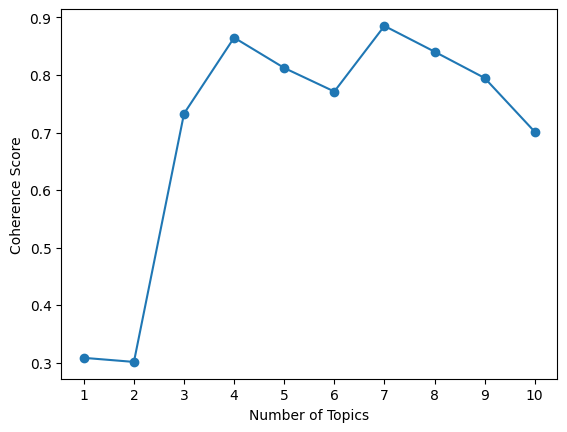

In [157]:
# plot coherence scores

num_topics = range(1, len(coherence_scores) + 1)
plt.plot(num_topics, coherence_scores, marker='o')

# Adding labels and title
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')

plt.xticks(num_topics)

plt.show()

# Visualize the Topics

In [164]:
lda_model = LdaModel(corpus, num_topics=2, id2word=id2word, passes=15)


In [165]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.064154  0.0       1        1  51.576045
0     -0.064154  0.0       2        1  48.423955, topic_info=       Term      Freq     Total Category  logprob  loglift
61      tea  2.000000  2.000000  Default  30.0000  30.0000
19  morning  2.000000  2.000000  Default  29.0000  29.0000
77    night  2.000000  2.000000  Default  28.0000  28.0000
7    coffee  2.000000  2.000000  Default  27.0000  27.0000
42  embrace  1.000000  1.000000  Default  26.0000  26.0000
..      ...       ...       ...      ...      ...      ...
16   flavor  0.846401  1.715399   Topic2  -4.5105   0.0188
15     feel  0.846268  1.715403   Topic2  -4.5106   0.0186
52    offer  0.845568  1.715422   Topic2  -4.5115   0.0178
37      air  0.845550  1.715423   Topic2  -4.5115   0.0177
51   moment  0.845537  1.715423   Topic2  -4.5115   0.0177

[114 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
93        1  0.868600     activity
94        1  0.868600        ahead
37        1  0.582947          air
37        2  0.582947          air
96        1  0.868601       amidst
...     ...       ...          ...
62        2  0.880326       teacup
117       1  0.868599         tone
63        2  0.880327  tranquility
64        2  0.880327       warmth
118       1  0.868601      whether

[94 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

- Each bubble represents a topic
- The larger the bubble, the higher percentage of the number of documents in the corpus is about that topic
- Blue bars represent the frequency of each word in the corpus
- Red bars give the estimated number of times a term was generated by a given topic
- The further the bubbles (topics) are away from each other, the more different they are



# Your Turn!

Upload the data I sent you, or upload your own data (can be done on the left side under "Files")

In [43]:
folder_path = 'data/'

documents = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as file:
        doc = file.read()
        documents.append(doc)

In [ ]:
documents

# 1) Preprocessing

In [ ]:
preprocessed_documents = ...

# 2) LDA Model

In [ ]:
id2word = ...
corpus = ...

In [ ]:
lda_model = ...

# 3) Plot Coherence Scores

In [ ]:
coherence_scores = ...

In [ ]:
# plot


# 4) Visualize Topics

In [ ]:
...

# ...Already finished? Download some additional texts from the internet and apply topic modelling on them.

 You can use wikipedia texts, https://www.gutenberg.org/about/ to download books, or any other webpage that is interesting to you. You can also use texts from your own research!